# Daily Challenge : Analysis of Airplane Crashes and Fatalities


Objective:

Utilize Python, Pandas, NumPy, and SciPy to conduct a thorough analysis of the “Airplane Crashes and Fatalities upto 2023” dataset. This challenge will encompass data cleaning, exploratory analysis, statistical testing, and visualization to draw meaningful insights.
Dataset:

Work with the “Airplane Crashes and Fatalities upto 2023” dataset, which provides comprehensive details about airplane crashes, including dates, locations, fatalities, and more. Access the dataset here.

Tasks:

    Data Import and Cleaning:

    Import the dataset using Pandas.
    Clean and preprocess the data, addressing missing values and categorizing data as needed.

    Convert dates and other relevant fields to appropriate formats.

    Exploratory Data Analysis:

    Use Pandas to explore basic statistics such as the number of crashes, fatalities, and survival rates.

    Analyze the frequency of crashes over time to identify any trends.

    Statistical Analysis:

    Apply SciPy to analyze the distribution of fatalities and survival rates. Calculate key statistics like mean, median, and standard deviation.

    Conduct a hypothesis test (e.g., comparing the average number of fatalities in different decades or regions).

    Visualization:

    Create charts and graphs using Matplotlib and Seaborn to visualize the findings from your exploratory data analysis and statistical tests.

    Examples might include time series plots of crashes over years, bar charts of crashes by region, and histograms of fatalities.

    Insight and Report:

    Summarize your findings and provide insights into the patterns or anomalies discovered in the data.
    Prepare a well-structured report including all code, visualizations, and interpretations.


---

## About dataset:

- `Accident` : Unique identifier for each airplane crash incident.
- `Date` : Date when the accident occurred.
- `Location` : Geographical location where the crash took place.
- `Aircraft` : Type of aircraft involved in the accident.
- `Fatalities` : Number of fatalities resulting from the crash.
- `Survivors` : Number of survivors from the accident.
- `Cause` : Primary cause of the accident (e.g., pilot error, mechanical failure).
- `Flight_Number` : Flight number associated with the incident.
- `Operator` : Airline or operator responsible for the flight.
- `Passengers` : Total number of passengers on board during the flight.

---

## **Data Import and Cleaning**:

Import the dataset using Pandas.

Clean and preprocess the data, addressing missing values and categorizing data as needed.

Convert dates and other relevant fields to appropriate formats.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='latin-1')


# Display basic dataframe info
print("### Dataset Preview")
display(df.head())
print("\n### Dataset Information")
df.info()

### Dataset Preview


,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...



### Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non

Many fields have wrong data type, like date and time that should be datetime. Fatalities is float, when should be integer.

In [3]:
# fix data types, coercing errors (keeping NaNs)
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['Fatalities'] = df['Fatalities'].astype('Int64')
df['Aboard'] = pd.to_numeric(df['Aboard'], errors='coerce').astype('Int64')
df['Aboard Passangers'] = pd.to_numeric(df['Aboard Passangers'], errors='coerce').astype('Int64')
df['Aboard Crew'] = pd.to_numeric(df['Aboard Crew'], errors='coerce').astype('Int64')
df['Fatalities'] = pd.to_numeric(df['Fatalities'], errors='coerce').astype('Int64')
df['Fatalities Passangers'] = pd.to_numeric(df['Fatalities Passangers'], errors='coerce').astype('Int64')
df['Fatalities Crew'] = pd.to_numeric(df['Fatalities Crew'], errors='coerce').astype('Int64')
df['Ground'] = pd.to_numeric(df['Ground'], errors='coerce').astype('Int64')

<ipython-input-3-634a01091ce4>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce')


In [4]:
print("\n### Dataset Summary Statistics")
display(df.describe())


### Dataset Summary Statistics


,Date,Time,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
count,4998,3483,4980.0,4769.0,4772.0,4990.0,4756.0,4757.0,4956.0
mean,1971-07-04 09:31:37.238895528,2024-12-10 13:05:33.936261632,31.195984,27.009017,4.479254,22.373547,19.053827,3.578516,1.719128
min,1908-09-17 00:00:00,2024-12-10 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1951-06-15 06:00:00,2024-12-10 08:53:00,7.0,3.0,2.0,4.0,1.0,2.0,0.0
50%,1970-11-27 00:00:00,2024-12-10 13:15:00,16.0,12.0,4.0,11.0,8.0,3.0,0.0
75%,1992-06-06 18:00:00,2024-12-10 17:56:00,35.0,30.0,6.0,25.0,21.0,5.0,0.0
max,2023-11-01 00:00:00,2024-12-10 23:59:00,644.0,614.0,61.0,583.0,560.0,46.0,2750.0
std,NaN,NaN,45.534788,44.111609,3.483859,35.061741,34.146127,3.167922,55.540273


The total number of fatalities (up to 2023) is 4,990. The average is 22, with a standard deviation of 35, indicating significant variation compared to the mean. Notably, there is one outstanding accident with 583 registered fatalities, suggesting that more than one aircraft may have been involved.


### Missing Values


,Missing Values,Percentage (%)
Date,0,0.000000
Time,1515,30.312125
Location,4,0.080032
Operator,10,0.200080
Flight #,3669,73.409364
Route,777,15.546218
AC Type,15,0.300120
Registration,274,5.482193
cn/ln,668,13.365346
Aboard,18,0.360144


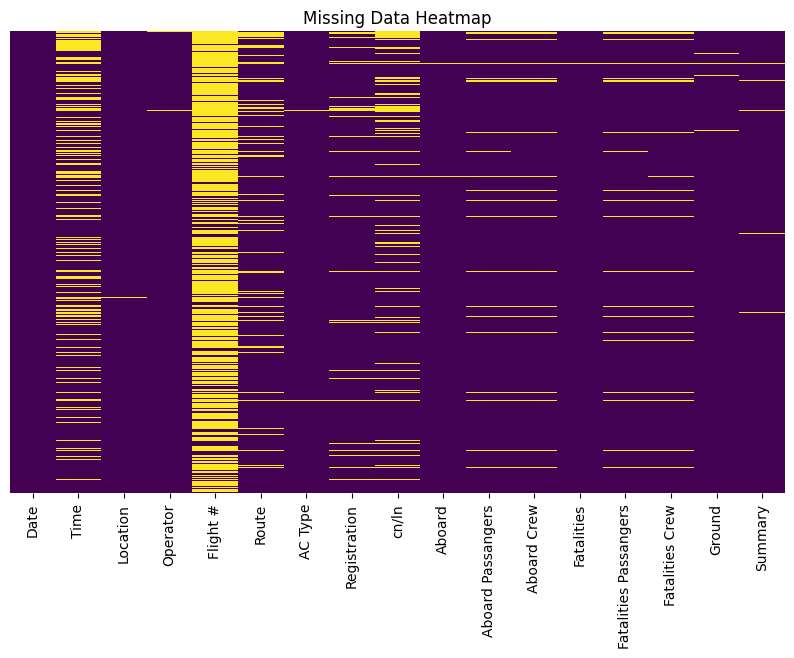

In [5]:
# missing values
print("\n### Missing Values")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_data, 'Percentage (%)': missing_percentage})
display(missing_table)

# visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

We have many fields, the easiest approach is to simply remove all rows with missing values in relevant fields, which will leave us with a very reduced dataset. Instead, we will address them as needed according the statistic needed at the moment.


We check duplicates:

In [6]:
df.duplicated().sum()

0

## **Exploratory Data Analysis**:

* Use Pandas to explore basic statistics such as the number of crashes, fatalities, and survival rates.

* Analyze the frequency of crashes over time to identify any trends.


We apply feature engineering to classify flights based on people aboard

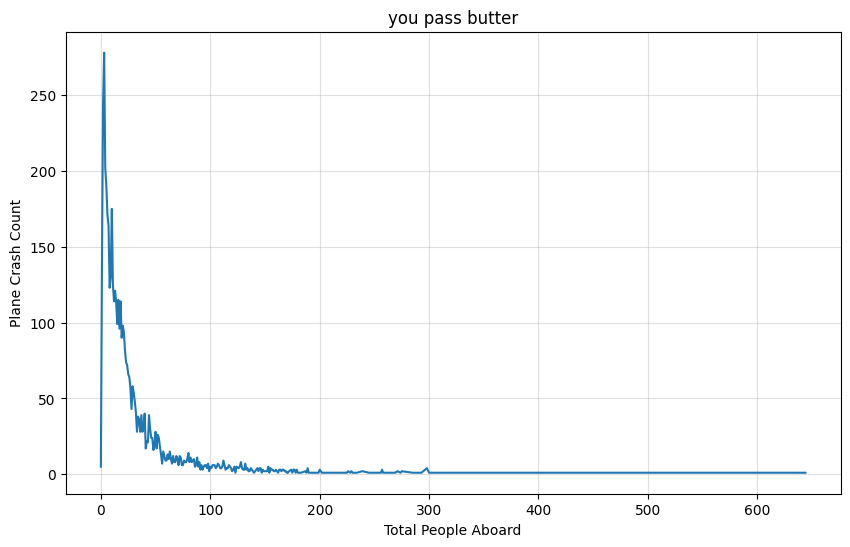

Maximum 'Aboard': 3


In [7]:
# count 'aboard' ocurrences
aboard_counts = df['Aboard'].value_counts().sort_index()

# create line plot for the 'aboard' dist
plt.figure(figsize=(10, 6))
plt.plot(aboard_counts.index, aboard_counts.values)
plt.xlabel('Total People Aboard')
plt.ylabel('Plane Crash Count')
plt.title('you pass butter')
plt.grid(True, alpha=.4)
plt.show()

# obtain maximum
max_aboard = aboard_counts.idxmax()
print(f"Maximum 'Aboard': {max_aboard}")

The distribution is completely skewed, and we can observe that it is primarily composed of small (likely private) flights. TThe plot suggests a multimodal curve, with modes around 3, 50, 90, 150, and 300. From this, we can draw the following three points:

* It suggests that small/private flights may have a larger population than commercial flights. Additional data is needed to verify this, such as the actual distribution of aircraft sizes.

* Most crashes involve small/private flights; however, we need to verify the real-time distribution of flights. It is possible that commercial flights may have fewer accidents (although potentially more fatalities) because commercial pilots are subject to stricter regulations and oversight.

* We can perform feature engineering based on the identified modes.


Since the visual identification of modes is not the most orthodox way, we need real-world examples:

-  **Light Jets**: Typically carry 4 to 8 passengers (e.g., Cessna Citation CJ series).

-  **Midsize Jets**: Generally accommodate around 8 to 10 passengers (e.g., Hawker 800).

-  **Large Jets**: Can carry from 100 to over 500 passengers, such as the Boeing 747 or Airbus A380.

The tmeptative plane size categories are then: small (up to 10 aboard), medium (10 < people aboard < 100), large.

In [8]:
# some feature engineering we can apply is based on 'Aboard'
# notice this is not a linear classification
aboard_categories = ['small', 'medium', 'large']

# define function to classify
def classify_flight_size(value):
    if value <= 10:
        return 'small'
    elif value >= 100:
        return 'large'
    else:
        return 'medium'

# apply the funtion to create the new column
df['Plane Size'] = df['Aboard'].apply(classify_flight_size)

# print ranges
print(f"Small plane crashes: {df[df['Plane Size'] == 'small'].shape[0]}")
print(f"Medium plane crashes: {df[df['Plane Size'] == 'medium'].shape[0]}")
print(f"Large plane crashes: {df[df['Plane Size'] == 'large'].shape[0]}")

Small plane crashes: 1822
Medium plane crashes: 2831
Large plane crashes: 345


It is extremely likely medium and large planes are commercial ones

In [9]:
# print(f"## Total crashes: {len(df)}")
# print(f"## Total fatalities: {df['Fatalities'].sum()}")

# now we remove rows with missing values from the relevant fields
df_cleaned = df.dropna(subset=['Date', 'Fatalities', 'Aboard']).copy()

# survival ratio by crash
df_cleaned['Survival Rate'] = df_cleaned.apply(lambda row: (row['Aboard'] - row['Fatalities']) / row['Aboard'] if row['Aboard'] > 0 else 0, axis=1)
print(f"## Average survival rate: {df_cleaned['Survival Rate'].mean():.2f}\n")


## Average survival rate: 0.18



We can observe yearly trends by size category:

In [10]:
# first we group by year
df_grouped = df_cleaned.groupby(df_cleaned['Date'].dt.year).agg({
    'Date': 'count', # we add it and rename it!!!!!
    'Fatalities': 'sum',
    'Aboard': 'sum',
    'Survival Rate': 'mean'
}).rename(columns={'Date': 'Incident Count'}).reset_index()

# find the year with the maximum incident count
max_incident_year = df_grouped.loc[df_grouped['Incident Count'].idxmax(), 'Date']
print(f"The year with the maximum incident count is: {max_incident_year}")

The year with the maximum incident count is: 1946


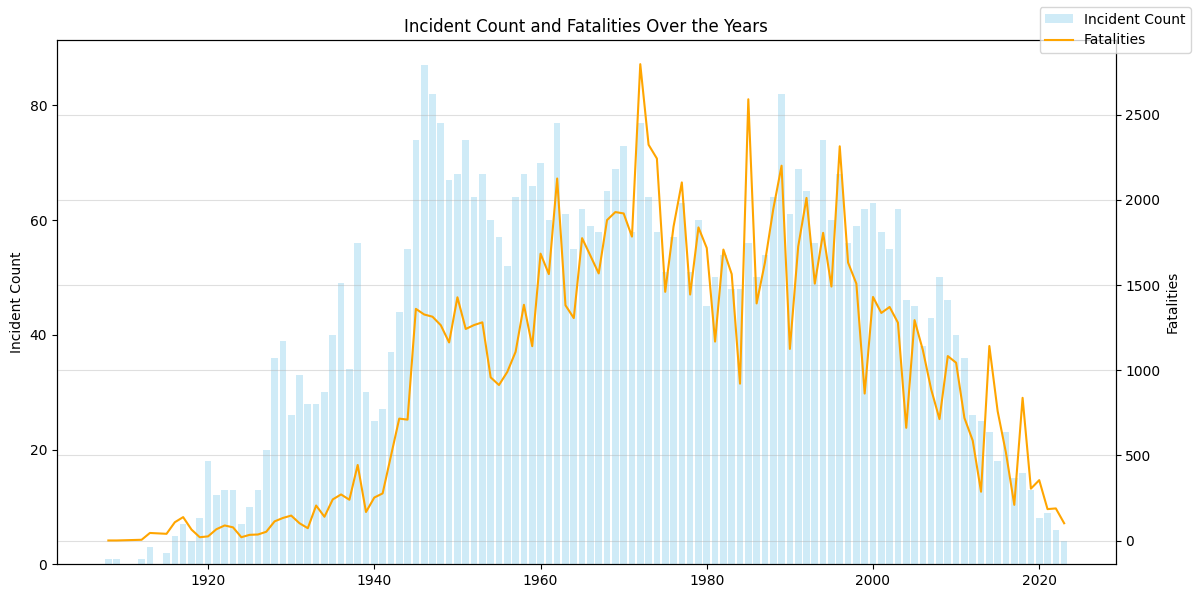

In [11]:
# plot crashes and survival over the years
fig, ax1 = plt.subplots(figsize=(12, 6))

# bar plot for 'Incident Count'
ax1.bar(df_grouped['Date'], df_grouped['Incident Count'], color='skyblue', label='Incident Count', alpha=.4)
ax1.set_xlabel('') # redundant
ax1.set_ylabel('Incident Count', color='k')
ax1.tick_params(axis='y', labelcolor='k')

# second y-axis for 'Fatalities'
ax2 = ax1.twinx()
ax2.plot(df_grouped['Date'], df_grouped['Fatalities'], color='orange', label='Fatalities')
ax2.set_ylabel('Fatalities', color='k')
ax2.tick_params(axis='y', labelcolor='k')


# titles, legend
plt.title('Incident Count and Fatalities Over the Years')
fig.legend()
plt.grid(alpha=.4)
plt.tight_layout()
plt.show()

The fatalities:incident count ratio is inverted around 1962. The early 1960s saw the dawn of the ["Golden Age of Air Travel"](https://allaboutshipping.co.uk/2022/08/09/the-history-of-commercial-flight-how-global-travel-took-off/).

The incident count increases consistently as more planes are built. Around 1924, there appears to be a small dip. Around 1940, there is another dip, possibly due to the beginning of World War II. The maximum incident count is reached in 1946, after the end of WWII. It remains relatively constant (with its own variability) until 2003, when it descends abruptly, possibly due to stricter regulations following the events of September 11.

## Statistical Analysis:

* Apply SciPy to analyze the distribution of fatalities and survival rates. Calculate key statistics like mean, median, and standard deviation.

* Conduct a hypothesis test (e.g., comparing the average number of fatalities in different decades or regions).

**Can't be done with A/B test**:

An A/B test is not suitable for this type of analysis. While we can use A/B tests to compare two separate elements, it is not valid to conduct pairwise comparisons across an entire dataset, especially over multiple decades. For a long-term study comparing averages, such as the number of fatalities in different decades or regions, we should consider using methods like ANOVA.


In [12]:
# global fatality stats with scipy
fatalities_mean, fatalities_var = stats.describe(df_cleaned['Fatalities'])[2:4] # [2] = mean, [3] = variance (std needs sqrt)
fatalities_std = np.sqrt(fatalities_var) # Convert variance to standard deviation
fatalities_median = stats.scoreatpercentile(df_cleaned['Fatalities'], 50)

# global survival rate stats with scipy
survival_mean, survival_var = stats.describe(df_cleaned['Survival Rate'])[2:4] # [2] = mean, [3] = variance (std needs sqrt)
survival_std = np.sqrt(survival_var) # Convert variance to standard deviation
survival_median = stats.scoreatpercentile(df_cleaned['Survival Rate'], 50)

# global fatality stats with numpy
np_fatalities_mean = np.mean(df_cleaned['Fatalities'])
np_fatalities_median = np.median(df_cleaned['Fatalities'])
np_fatalities_std = np.std(df_cleaned['Fatalities'])

# global survival rate stats with numpy
np_survival_mean = np.mean(df_cleaned['Survival Rate'])
np_survival_median = np.median(df_cleaned['Survival Rate'])
np_survival_std = np.std(df_cleaned['Survival Rate'])

print(f"## Global scipy fatalities - Mean: {fatalities_mean:.2f}, Median: {fatalities_median:.2f}, Standard Deviation: {fatalities_std:.2f}")
print(f"## Global scipy survival rate - Mean: {survival_mean:.2f}, Median: {survival_median:.2f}, Standard Deviation: {survival_std:.2f}")
print(f"## Global numpy fatalities - Mean: {np_fatalities_mean:.2f}, Median: {np_fatalities_median:.2f}, Standard Deviation: {np_fatalities_std:.2f}")
print(f"## Global numpy survival rate - Mean: {np_survival_mean:.2f}, Median: {np_survival_median:.2f}, Standard Deviation: {np_survival_std:.2f}")

## Global scipy fatalities - Mean: 22.40, Median: 11.00, Standard Deviation: 35.09
## Global scipy survival rate - Mean: 0.18, Median: 0.00, Standard Deviation: 0.31
## Global numpy fatalities - Mean: 22.40, Median: 11.00, Standard Deviation: 35.09
## Global numpy survival rate - Mean: 0.18, Median: 0.00, Standard Deviation: 0.31


In [13]:
# with a function is more convenient:
def scipy_stats(array):
  array_mean, array_var = stats.describe(array)[2:4]
  array_std = np.sqrt(array_var)
  array_median = stats.scoreatpercentile(array, 50)
  return array_mean, array_median, array_std

# define fatality stats dataframe
df_fatality_stats = pd.DataFrame(index=['mean', 'median', 'std'],
                                 columns=['small planes', 'medium planes', 'large planes', 'all sizes'])

df_fatality_stats['small planes'] = scipy_stats(df_cleaned[df_cleaned['Plane Size'] == 'small']['Fatalities'])
df_fatality_stats['medium planes'] = scipy_stats(df_cleaned[df_cleaned['Plane Size'] == 'medium']['Fatalities'])
df_fatality_stats['large planes'] = scipy_stats(df_cleaned[df_cleaned['Plane Size'] == 'large']['Fatalities'])
df_fatality_stats['all sizes'] = scipy_stats(df_cleaned['Fatalities'])

# define survival rate stats dataframe
df_survival_stats = pd.DataFrame(index=['mean', 'median', 'std'],
                                 columns=['small planes', 'medium planes', 'large planes', 'all sizes'])

df_survival_stats['small planes'] = scipy_stats(df_cleaned[df_cleaned['Plane Size'] == 'small']['Survival Rate'])
df_survival_stats['medium planes'] = scipy_stats(df_cleaned[df_cleaned['Plane Size'] == 'medium']['Survival Rate'])
df_survival_stats['large planes'] = scipy_stats(df_cleaned[df_cleaned['Plane Size'] == 'large']['Survival Rate'])
df_survival_stats['all sizes'] = scipy_stats(df_cleaned['Survival Rate'])


print("## Fatality stats:\n")
display(df_fatality_stats)
print("\n## Survival rate stats:\n")
display(df_survival_stats)

## Fatality stats:



,small planes,medium planes,large planes,all sizes
mean,4.397366,24.763242,98.231884,22.401807
median,4.000000,20.000000,108.000000,11.000000
std,2.745503,19.540747,84.443483,35.089616



## Survival rate stats:



,small planes,medium planes,large planes,all sizes
mean,0.117063,0.199313,0.373770,0.181307
median,0.000000,0.000000,0.058824,0.000000
std,0.243710,0.321318,0.430667,0.311621


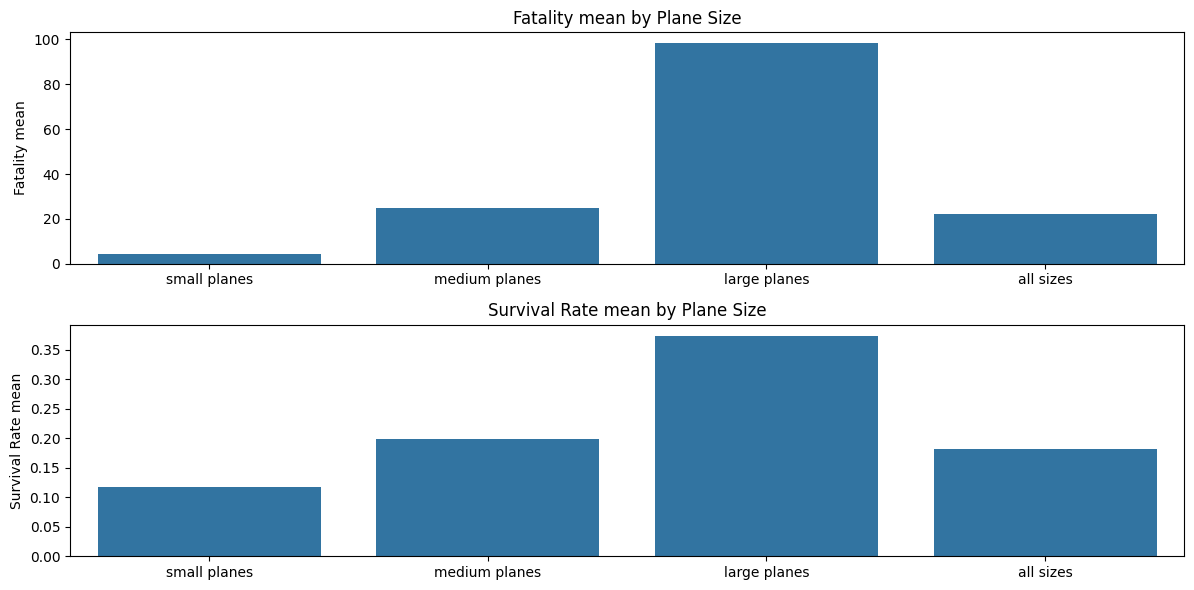

In [14]:
# we plot the dataframes stats
plt.figure(figsize=(12, 6))

# first subplot for fatality mean
plt.subplot(2, 1, 1) # (rows, cols, panel number)
plt.title('Fatality mean by Plane Size')
sns.barplot(x=df_fatality_stats.columns, y=df_fatality_stats.loc['mean'])
plt.xlabel('')
plt.ylabel('Fatality mean')

# second subplot for survival rate
plt.subplot(2, 1, 2)
plt.title('Survival Rate mean by Plane Size')
sns.barplot(x=df_survival_stats.columns, y=df_survival_stats.loc['mean'])
plt.xlabel('')
plt.ylabel('Survival Rate mean')

plt.tight_layout()
plt.show()

 The trend in fatality rates by plane size is logical, as larger planes transport more people.

 The average survival rate in a plane crash is 18%. This significant value suggests that the dataset does not only classify a crash as a fall from the sky but may also include ground accidents. However, when we segregate by plane size, we see that the survival rate is doubled for medium and tripled for large aircrafts. Private planes are subject to fewer regulations; for example, a small fumigating plane pilot might become overconfident and be more prone to crashing into cables at high speed.

Let us analyze the survival rate along the years:

In [15]:
# total amount of years
total_years = df_grouped['Date'].max() - df_grouped['Date'].min() + 1

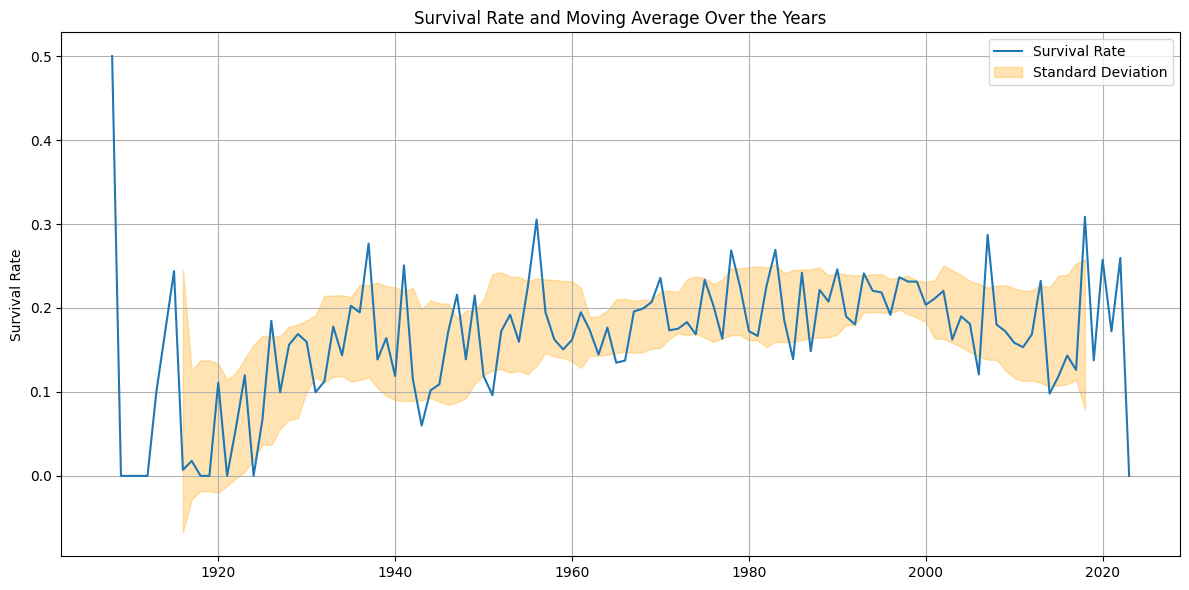

## Moving average window size is 11. Based on the squared root of total years.


In [16]:
# prepare moving average
window_size = round(total_years ** 0.5)
weights = np.ones(window_size) / window_size
moving_average = np.convolve(df_grouped['Survival Rate'], weights, mode='valid')

# Standard deviation calculation using a rolling window
# We modify the rolling function to center the window and avoid NaNs
std_dev = df_grouped['Survival Rate'].rolling(window=window_size, center=True).std().dropna().values

# Dates for moving average and std dev alignment
# We adjust the dates for alignment after std_dev changes
dates_for_moving_average = df_grouped['Date'][int(window_size/2):-int(window_size/2)].values # align with the center

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['Date'], df_grouped['Survival Rate'], label='Survival Rate')
# plt.scatter(df_grouped['Date'], df_grouped['Survival Rate'], label='Survival Rate', color='k', s=1)
# plt.plot(dates_for_moving_average, moving_average, label='Moving Average', color='orange', alpha=0)

# Adding shaded area for standard deviation
# We correct the slicing of std_dev with the correct moving average range
plt.fill_between(dates_for_moving_average,
                 moving_average - std_dev,
                 moving_average + std_dev,
                 color='orange', alpha=0.3, label='Standard Deviation')

# Set labels and title
plt.xlabel('')
plt.ylabel('Survival Rate')
plt.title('Survival Rate and Moving Average Over the Years')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

print(f"## Moving average window size is {window_size}. Based on the squared root of total years.")

After the 1930s, the survival rate remained relatively constant. To verify this, we can examine the range from 1930 to 2020 across the decades. The null hypothesis would be that there have not been changes in the survival rate; we will use a tolerance value of p < 0.05.

In [17]:
# we define the bin for the decades
decades_arr = np.arange(1930, 2030, 10)

# we create the bins for decades
bins = [f"{year}-01-01" for year in decades_arr]
bins = pd.to_datetime(bins)

# assign each date to a decade bin
df_cleaned['Decade'] = pd.cut(df_cleaned['Date'], bins=bins, right=False) # right=False so are right-opened

# calculate the mean survival rate for each decade
survival_rate_by_decade = df_cleaned.groupby('Decade', observed=True)['Survival Rate'].mean().reset_index()

# Force decades_arr[:-1] as index
# survival_rate_by_decade = survival_rate_by_decade.set_index(pd.Index(decades_arr[:-1])) # !!!!!!!!!
survival_rate_by_decade['Decade'] = decades_arr[:-1]

# checkout
print(survival_rate_by_decade)

   Decade  Survival Rate
0    1930       0.168412
1    1940       0.153138
2    1950       0.173275
3    1960       0.172948
4    1970       0.201392
5    1980       0.198307
6    1990       0.217563
7    2000       0.193734
8    2010       0.163262


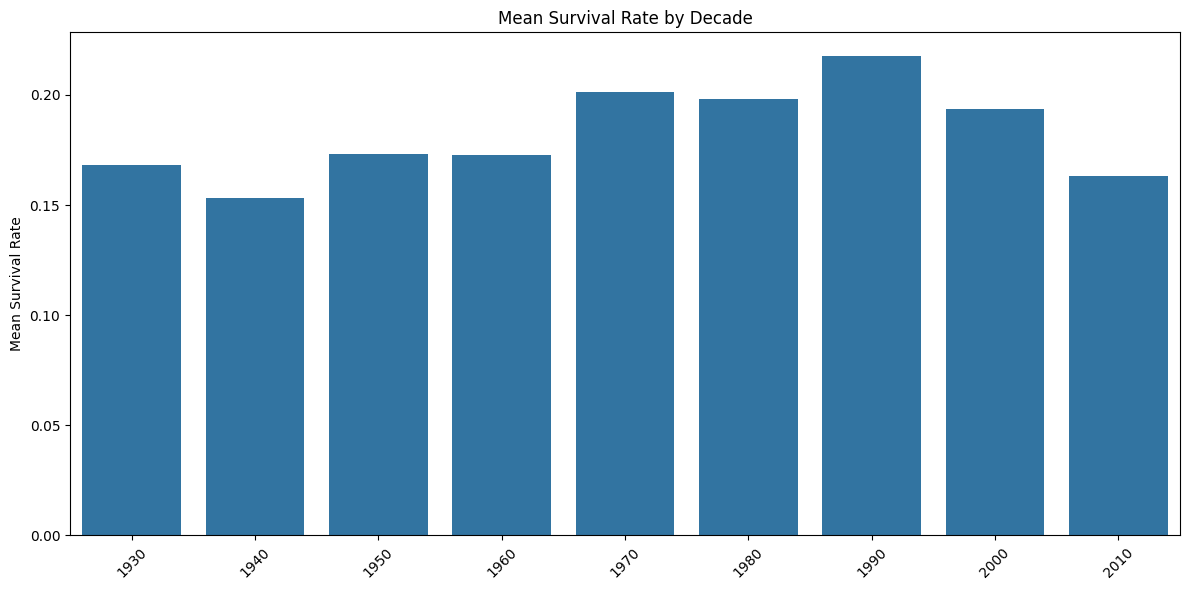

## t-statistic: 2.462607691855911
## p-value: 0.01164906944562582


In [18]:
# barplot of survival rate by decades
plt.figure(figsize=(12, 6))
sns.barplot(x='Decade', y='Survival Rate', data=survival_rate_by_decade)

# title & labels
plt.xlabel('')
plt.ylabel('Mean Survival Rate')
plt.title('Mean Survival Rate by Decade')
plt.xticks(rotation=45)

# release the kraken
plt.tight_layout()
plt.show()

# ANOVA of Mean Survival Rate along decades
t_statistic, p_value = stats.f_oneway(*[group['Survival Rate'] for _,
                                        group in df_cleaned.groupby('Decade', observed=True)]) # observed=True

print(f"## t-statistic: {t_statistic}")
print(f"## p-value: {p_value}")

With a p-value < 0.05 we can discard the null hypothesis and affirm the mean survival rate by decade has changed from the 1930's to the 2010's

## Visualization:

* Create charts and graphs using Matplotlib and Seaborn to visualize the findings from your exploratory data analysis and statistical tests. (done)

* Examples might include time series plots of crashes over years, bar charts of crashes by region, and histograms of fatalities. (done)


# Insight and Report:

* Summarize your findings and provide insights into the patterns or anomalies discovered in the data.
* Prepare a well-structured report including all code, visualizations, and interpretations.

The dataset is a recompilation on airplane crashes reports from 1908 to 2023.

The plane crash distribution by total people on board is extremely right skewed with a max in 3. This might be due the general tribulation distribution of airplanes is composed mainly by small aircrafts, and future research is needed. Also, it can be due small/private plane pilots are less controlled than commercial ones.

An airplane size category division was proposed based on the tripulation capacity of small (up to 8), medium (between 10 and 100) and large jets (more than 100). The most reported crashes were on the 'medium' category (2831 total reports). This isn’t contradictory with the maximum in 3 tripulants, due the wider range in medium category.

Regarding the crashes count distribution by year, it increases consistently as more planes are built. Around 1924, there appears to be a small dip. Around 1940, there is another dip, possibly due to the beginning of World War II. The maximum incident count is reached in 1946, after the end of WWII. It remains relatively constant (with its own variability) until 2003, when it descends abruptly, possibly due to stricter regulations following the events of September 11.

The fatalities:incident count ratio is inverted around 1962. The early 1960s saw the dawn of the ["Golden Age of Air Travel"](https://www.google.com/url?q=https%3A%2F%2Fallaboutshipping.co.uk%2F2022%2F08%2F09%2Fthe-history-of-commercial-flight-how-global-travel-took-off%2F).

A Fatality Stats and a Survival Stats dataframes were built and divided according to the plane size categories. The trend in fatality rates by plane size is logical: as larger planes transport more people. The average survival rate in a plane crash is 18%. This significant value suggests that the dataset does not only classify a crash as a fall from the sky but may also include ground accidents. However, when we segregate by plane size, we see that the survival rate is doubled for medium and tripled for large aircrafts. This last trend might be due to tighter airflight regulations according to the size.

The mean survival rate moving average along the years seems fairly constant. But a deeper ANOVA along decades indicates the mean survival rate presents changes.
